In [3]:
import pandas as pd
from prophet import Prophet

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
# Python
m = Prophet()
m.fit(df)

20:29:53 - cmdstanpy - INFO - Chain [1] start processing
20:29:58 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209575,7.457083,8.955826
3266,2017-01-16,8.534612,7.837897,9.245412
3267,2017-01-17,8.322026,7.639803,9.088267
3268,2017-01-18,8.154668,7.431713,8.895688
3269,2017-01-19,8.166616,7.412689,8.892815


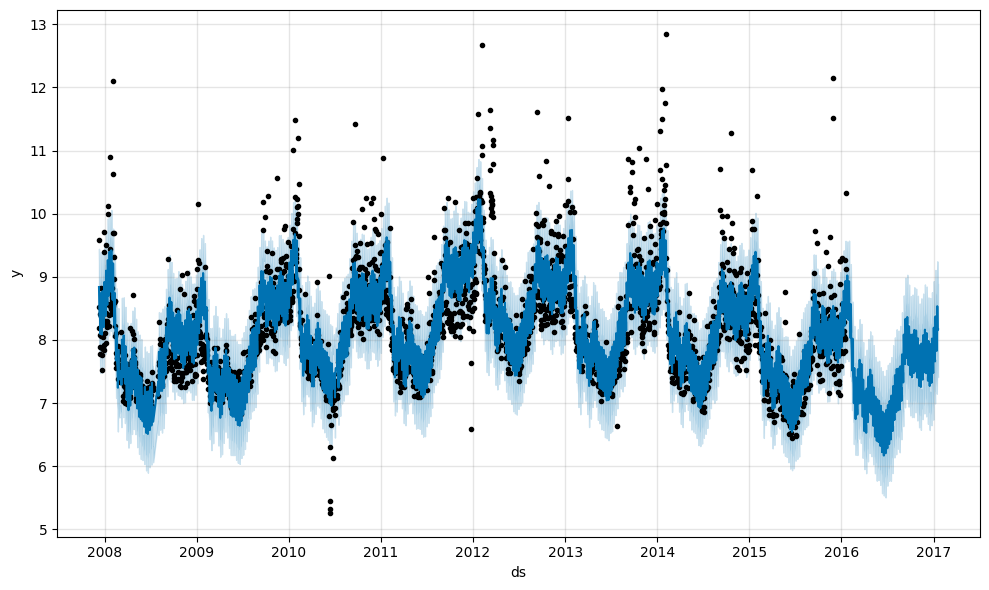

In [8]:
fig1 = m.plot(forecast)

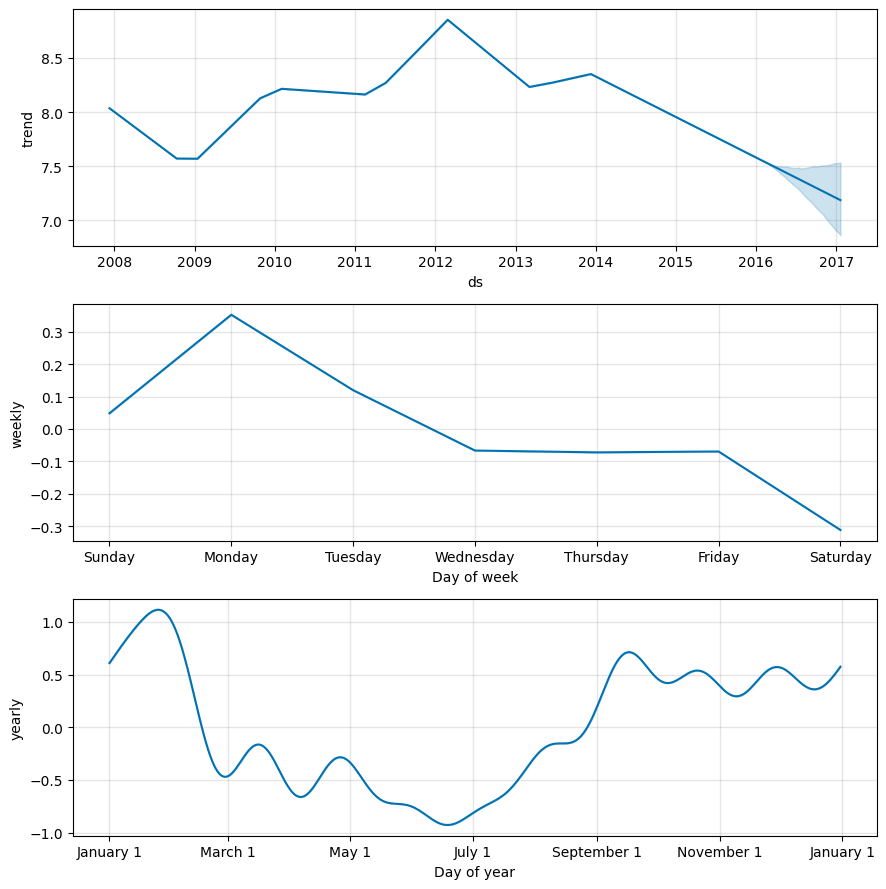

In [9]:
fig2 = m.plot_components(forecast)

In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [11]:
plot_components_plotly(m, forecast)

In [12]:
# Convert 'ds' column in df to datetime for proper merging
df['ds'] = pd.to_datetime(df['ds'])
result = pd.merge(df, forecast[['ds', 'yhat']], on='ds')

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# MAE
mae = mean_absolute_error(result['y'], result['yhat'])

# RMSE
rmse = np.sqrt(mean_squared_error(result['y'], result['yhat']))

# MAPE
mape = mean_absolute_percentage_error(result['y'], result['yhat'])

In [14]:
print("MAE :", mae)
print("RMSE :", rmse)
print("MAPE :", mape, "%")

MAE : 0.3356648001995767
RMSE : 0.48362784164269884
MAPE : 0.03998208828876479 %


In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(result['y'], result['yhat'])
print(f"R² : {r2:.4f}")
print(f"Pourcentage de réussite : {r2*100:.2f}%")

R² : 0.6731
Pourcentage de réussite : 67.31%
